
# <span style="color:rgb(213,80,0)">AR data: standard static way of data analysis (non\-robust and robust)</span>

In [1]:
% This file creates Figure A.5-A.6
% and Tables A.3-A.5

## MR (Multiple regression data): Forward EDA datatooltip which monitors bsb

In [2]:
load('multiple_regression.txt');
y=multiple_regression(:,4);
X=multiple_regression(:,1:3);

## Create Table A.3

In [3]:
mdl=fitlm(X,y);
disp('ANOVA table based on all the observations')

ANOVA table based on all the observations

In [4]:
disp(mdl)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      11.174    0.67501    16.553    3.1288e-23
    x1             -0.21796    0.17244    -1.264       0.21146
    x2               1.4981    0.15534    9.6439    1.6733e-13
    x3               2.2596    0.13668    16.531    3.3265e-23
Number of observations: 60, Error degrees of freedom: 56
Root Mean Squared Error: 1.09
R-squared: 0.965,  Adjusted R-Squared: 0.963
F-statistic vs. constant model: 510, p-value = 1.33e-40

## Create Table A.4

In [5]:
mdlExcl43=fitlm(X,y,'Exclude',43);
disp('ANOVA table after excluding observation 43')

ANOVA table after excluding observation 43

In [6]:
disp(mdlExcl43)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE        tStat       pValue  
                   ________    _______    _______    __________
    (Intercept)      11.724    0.66472     17.637    2.6658e-24
    x1             -0.32034     0.1664    -1.9251      0.059389
    x2                1.441    0.14773     9.7541    1.3511e-13
    x3               2.3627    0.13378     17.661    2.5023e-24
Number of observations: 59, Error degrees of freedom: 55
Root Mean Squared Error: 1.03
R-squared: 0.969,  Adjusted R-Squared: 0.967
F-statistic vs. constant model: 570, p-value = 2.19e-41

## Create Table A.5

In [7]:
mdlExcl24351=fitlm(X,y,'Exclude',[2 43 51]);
disp('ANOVA table after excluding observations 2, 43 and 51')

ANOVA table after excluding observations 2, 43 and 51

In [8]:
disp(mdlExcl24351)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate      SE       tStat       pValue  
                   ________    _______    ______    __________
    (Intercept)      12.075    0.63013    19.162    1.7287e-25
    x1             -0.44075    0.16022    -2.751     0.0081134
    x2               1.2608     0.1493    8.4448    2.1939e-11
    x3               2.4626    0.12873    19.131    1.8654e-25
Number of observations: 57, Error degrees of freedom: 53
Root Mean Squared Error: 0.961
R-squared: 0.972,  Adjusted R-Squared: 0.971
F-statistic vs. constant model: 615, p-value = 3.76e-41

## Create Figure A.5

MMreg with hyperbolic rho function


In [9]:
outHYP=MMreg(y,X,'rhofunc','hyperbolic','eff',0.95);

Total estimated time to complete S estimate:  0.83 seconds


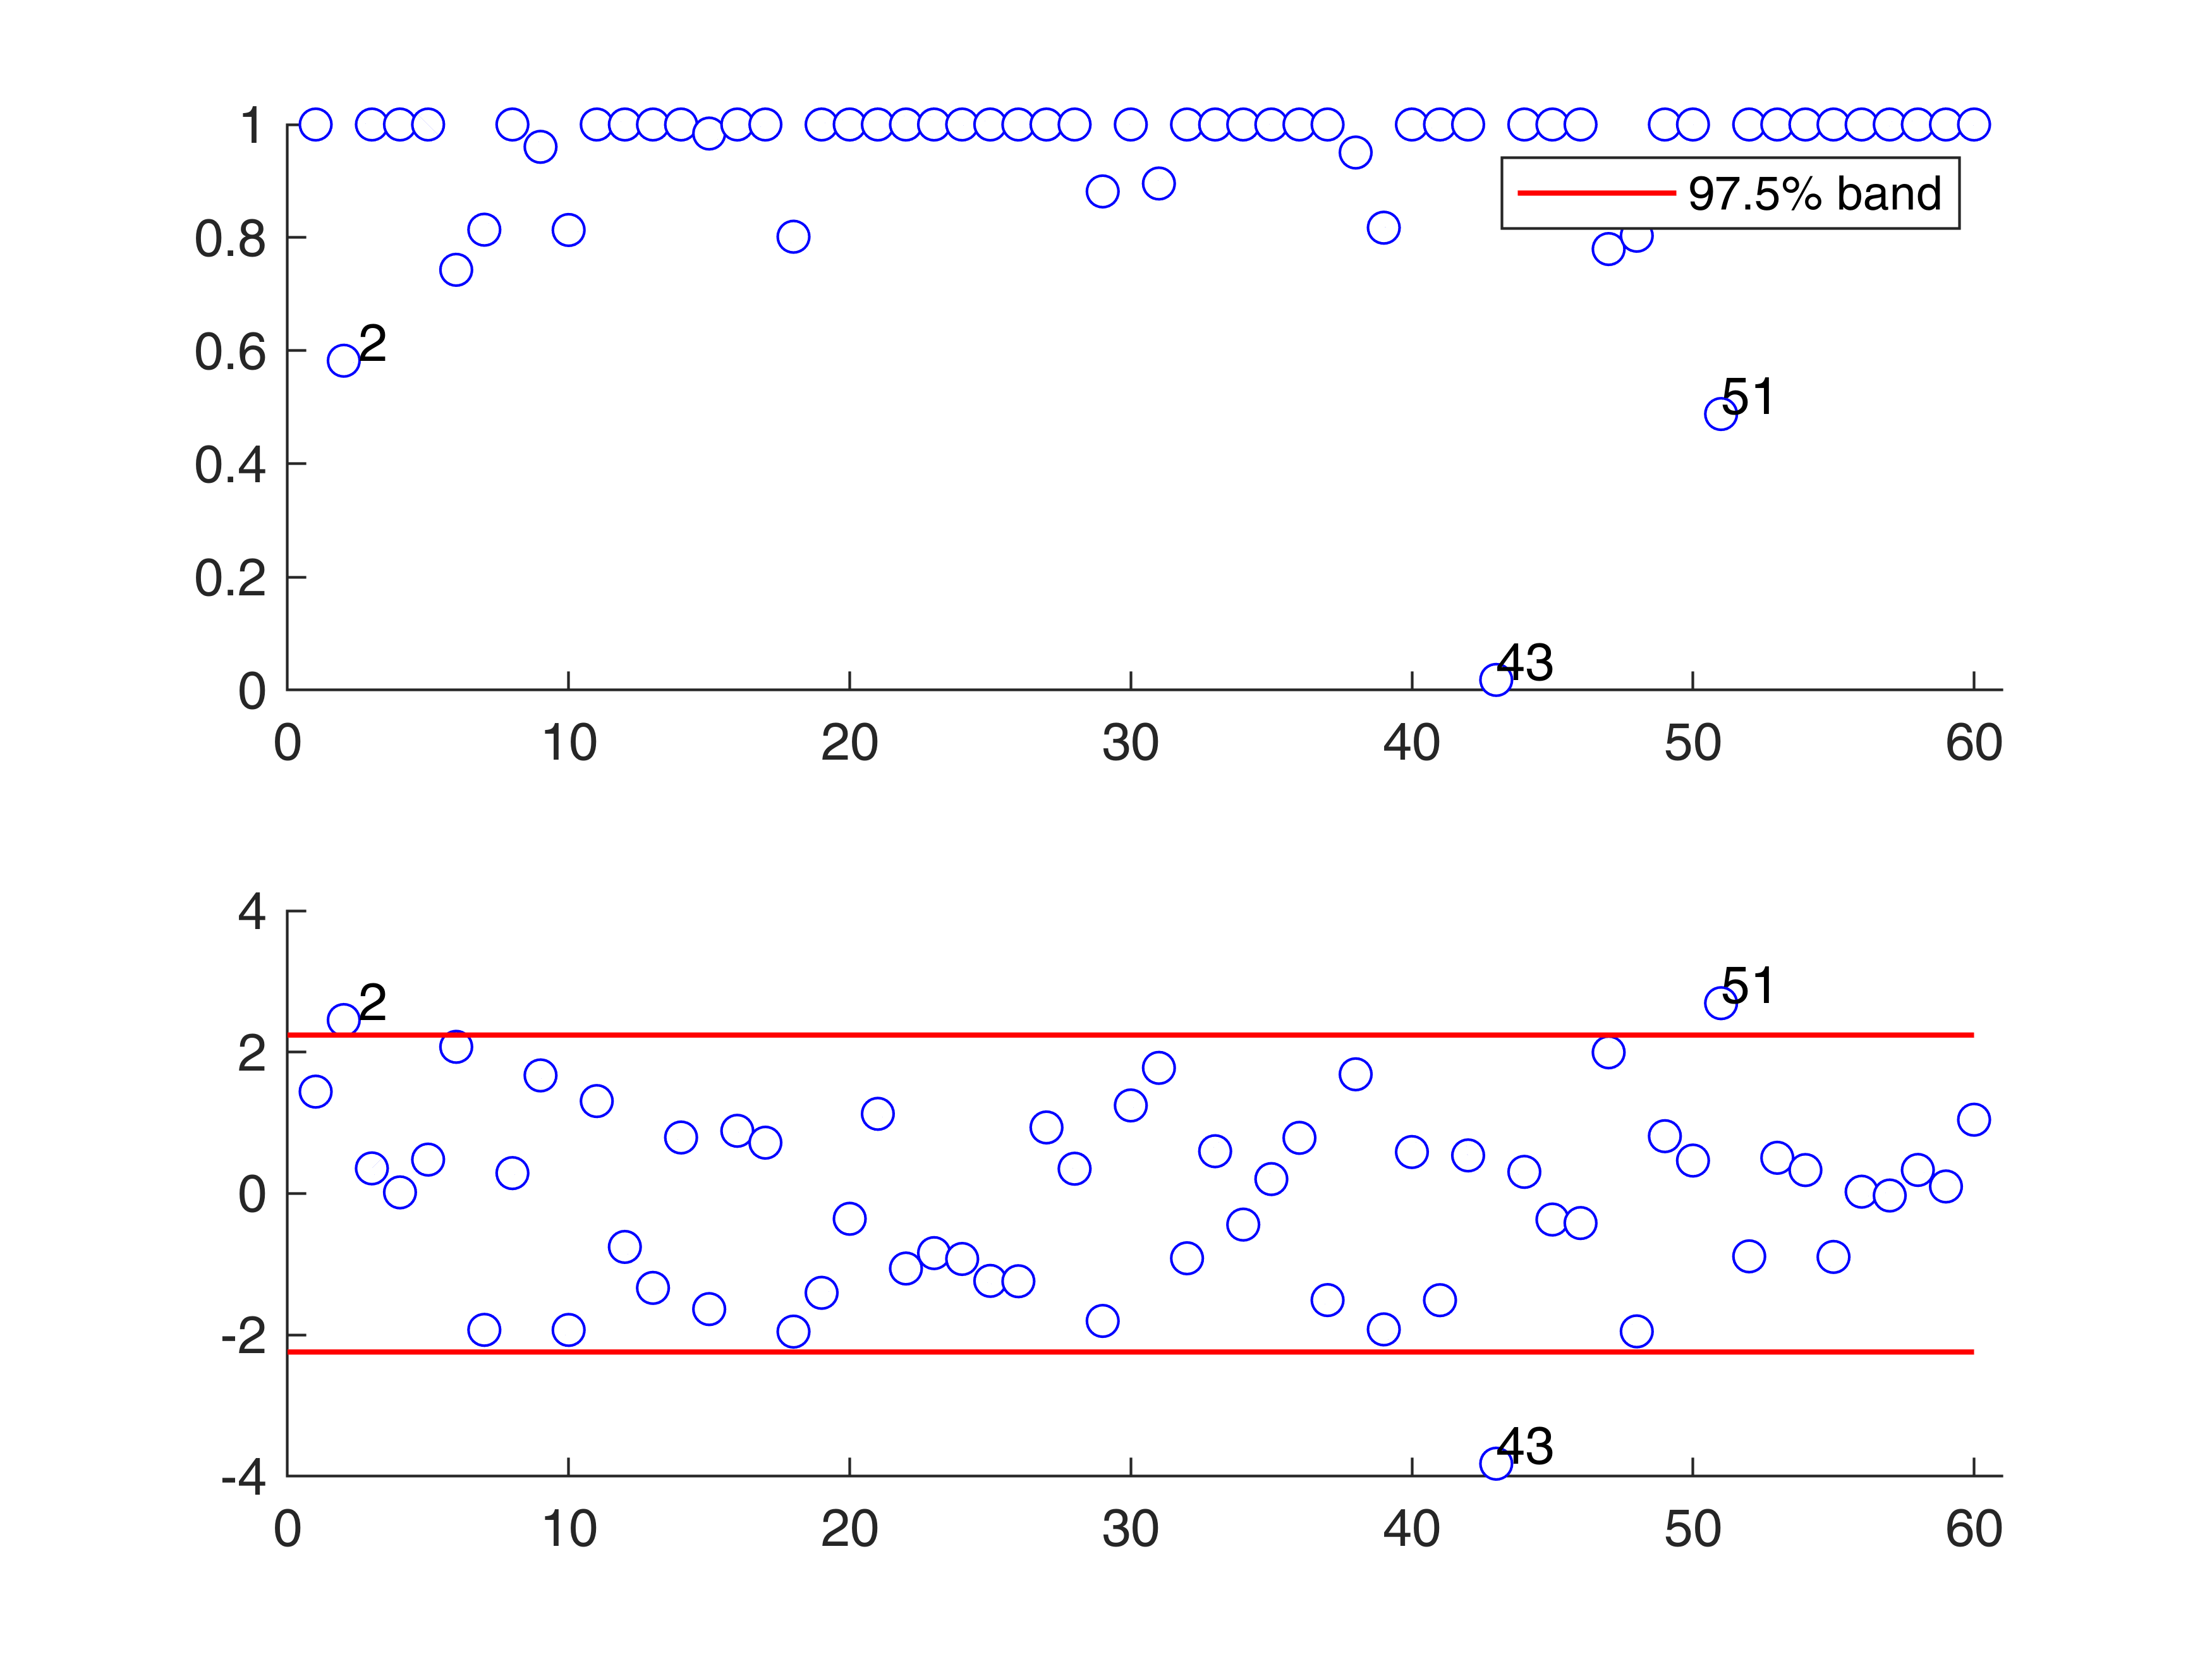

In [10]:

h1=subplot(2,1,1);
% Show the weights
resindexplot(outHYP.weights,'ylimy',[0 1],'h',h1,'numlab',[2 43 51])
%title('Weights')
title('')

h2=subplot(2,1,2);
% Show the scaled residuals
resindexplot(outHYP.residuals,'h',h2,'numlab',[2 43 51])
% title('Scaled residuals')
title('')

In [11]:

if prin==1
    % print to postscript
    print -depsc ARweiresMMhyp.eps
else
    sgtitle('Figure A.5')
set(gcf,"Name",'Figure A.5')

end

Unrecognized function or variable 'prin'.

## Create Figure A.6

MMreg with AS and PD rho functions (compare residuals)


In [12]:
outAS=MMreg(y,X,'rhofunc','AS');
outPD=MMreg(y,X,'rhofunc','mdpd');

figure
h1=subplot(2,1,1);
resindexplot(outAS.residuals,'h',h1,'numlab',[2 43 51])
title('Scaled residuals using Andrews'' sine')
title('')
h2=subplot(2,1,2);
resindexplot(outPD.residuals,'h',h2,'numlab',[2 43 51])
title('Scaled residuals using power divergence')
title('')

if prin==1
    % print to postscript
    print -depsc ARresMMaspd.eps;
else
sgtitle('Figure A.6')
set(gcf,"Name",'Figure A.6')
end

%InsideREADME